In [1]:
import matplotlib.pyplot as plt
import cv2

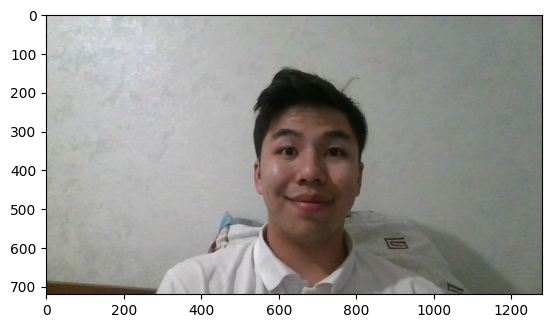

In [2]:
from skimage import io

img = io.imread('фото/tt/train/Ernar/12.jpg')
plt.imshow(img)

In [15]:
# from keras.preprocessing.image import ImageDataGenerator

# image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
#                                width_shift_range=0.1, # Shift the pic width by a max of 10%
#                                height_shift_range=0.1, # Shift the pic height by a max of 10%
#                                rescale=1/255, # Rescale the image by normalzing it.
#                                shear_range=0.3, # Shear means cutting away part of the image (max 20%)
#                                zoom_range=0.2, # Zoom in by 20% max
#                                horizontal_flip=True, # Allo horizontal flipping
#                                fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                           
                       
#                               )

In [16]:
# plt.imshow(image_gen.random_transform(img))

In [5]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255, # масштабирование значений пикселей в диапазон от 0 до 1
    rotation_range=20, # угол поворота изображения
    width_shift_range=0.2, # смещение изображения по горизонтали
    height_shift_range=0.2, # смещение изображения по вертикали
    shear_range=0.2, # сдвиг изображения
    zoom_range=0.2, # масштабирование изображения
    vertical_flip=True,
    horizontal_flip=True, # отражение изображения по горизонтали
    brightness_range= (0.5,2.5),
    fill_mode='nearest', # заполнение пикселей после преобразований
    preprocessing_function=preprocess_input # препроцессинг изображений для распознавания лиц

)

In [5]:
import os
from keras.preprocessing import image
import keras.utils as image


# The directory containing the original images
original_dir = 'фото/cuted_test/'

# The directory to save the augmented images to
augmented_dir = 'фото/aug_cuted_test'

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Generates augmented images and saves them to the augmented_dir
for root, dirs, files in os.walk(original_dir):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = image.load_img(img_path)
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = preprocess_input(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=augmented_dir,
                                  save_prefix=filename.split('.')[0],
                                  save_format='jpg'):
            i += 1
            if i >= 5: # Generate 5 augmented images per original image
                break


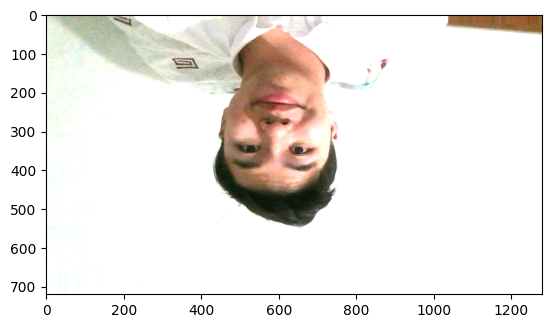

In [7]:
plt.imshow(datagen.random_transform(img).astype('uint8'))

In [97]:
# image_gen.flow_from_directory('фото/train/')

In [98]:
# image_gen.flow_from_directory('фото/test/')

In [8]:
datagen.flow_from_directory('фото/aug_tt/aug_train/')

Found 2818 images belonging to 15 classes.


In [9]:
datagen.flow_from_directory('фото/aug_tt/aug_test/')

Found 333 images belonging to 15 classes.


In [10]:
image_shape = (150,150,3)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam


# cnn_model= Sequential([
#     Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Flatten(),
#     Dense(1024, activation='relu'),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     #20 is the number of outputs
#     Dense(20, activation='softmax')  
# ])

# cnn_model.compile(
#     loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
#     optimizer=Adam(lr=0.0001),
#     metrics=['accuracy']
# )


# from keras.models import Sequential
# from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
# from keras.optimizers import Adam


# cnn_model= Sequential([
#     Conv2D(filters=32, kernel_size=3, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Conv2D(filters=64, kernel_size=3, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Flatten(),
#     Dense(1024, activation='relu'),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5)б
#     #20 is the number of outputs
#     Dense(20, activation='softmax')  
# ])

# cnn_model.compile(
#     loss='categorical_crossentropy',#'categorical_crossentropy',
#     optimizer=Adam(lr=0.001),
#     metrics=['accuracy']
# )


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
image_shape[:2]

NameError: name 'image_shape' is not defined

In [15]:
batch_size = 32

train_image_gen = datagen.flow_from_directory('фото/aug_tt/aug_train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #binary

Found 2818 images belonging to 15 classes.


In [16]:
test_image_gen = datagen.flow_from_directory('фото/aug_tt/aug_test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 333 images belonging to 15 classes.


In [28]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [18]:
test_image_gen.class_indices


{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
history = model.fit(train_image_gen,epochs=50,validation_data=test_image_gen)

Epoch 1/50
 4/89 [>.............................] - ETA: 2:42 - loss: 2.6922 - accuracy: 0.1094

KeyboardInterrupt: 

In [ ]:
# results = cnn_model.fit_generator(train_image_gen,epochs=100,
#                               steps_per_epoch=44,
#                               validation_data=test_image_gen,
#                              validation_steps=12)

In [34]:
results.history['accuracy']

[0.09019886702299118,
 0.11860795319080353,
 0.12997159361839294,
 0.15909090638160706,
 0.15980114042758942,
 0.17706821858882904,
 0.1896306872367859,
 0.19448475539684296,
 0.20454545319080353,
 0.21915820240974426,
 0.22786647081375122,
 0.25710228085517883,
 0.2563920319080353,
 0.25834542512893677,
 0.2642045319080353,
 0.2743105888366699,
 0.27721336483955383,
 0.2876420319080353,
 0.3178519606590271,
 0.32002902030944824,
 0.3188920319080353,
 0.33454281091690063,
 0.34107401967048645,
 0.3451704680919647,
 0.36211901903152466,
 0.3842329680919647,
 0.39042091369628906,
 0.37428978085517883,
 0.3925979733467102,
 0.38388970494270325,
 0.399129182100296,
 0.40566039085388184,
 0.4187227785587311,
 0.3896951973438263,
 0.4027576148509979,
 0.421625554561615,
 0.4361393451690674,
 0.43033382296562195,
 0.43039771914482117,
 0.4789550006389618,
 0.47159090638160706,
 0.4495738744735718,
 0.47727271914482117,
 0.4644412100315094,
 0.46661829948425293,
 0.5014204382896423,
 0.4936079

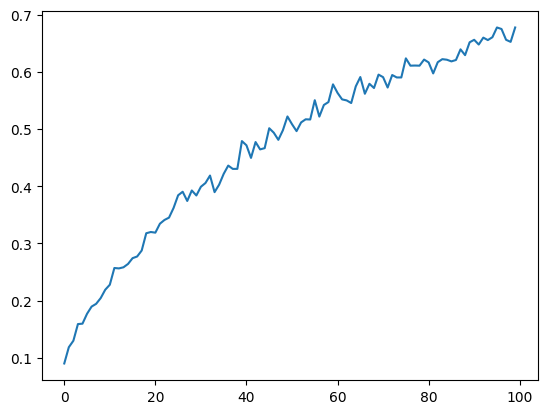

In [35]:
plt.plot(results.history['accuracy'])

In [36]:
 # cnn_model.save('qwe.h5')

In [37]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

dog_file = 'testing/baibat.jpg'
dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

FileNotFoundError: [Errno 2] No such file or directory: 'testing/baibat.jpg'

In [25]:

prediction_prob = cnn_model.predict(dog_img)
predict_x=cnn_model.predict(dog_img) 
ynew=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 103ms/step


In [26]:
# Output prediction
print(f'Probability that image is a dog is: {ynew} ')

Probability that image is a dog is: [0] 


In [36]:
# from sklearn.metrics import accuracy_score

# predicted =np.array(cnn_model.predict(test_image_gen))
# #print(predicted)
# #print(y_test)
# # ynew = cnn_model.predict_classes(test_image_gen)
# predict_x=cnn_model.predict(test_image_gen) 
# ynew=np.argmax(predict_x,axis=1)


# Acc=accuracy_score(test_image_gen.class_indices, ynew)
# print("accuracy : ")
# print(Acc)

In [30]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('face_recognition/321.h5')

class_dict = {
    # 4: 'Akhmedov Sanzhar',
    # 1: 'Alikhan Zhamankhan',
    # 2: 'Baibatchayeva Anar',
    # 3: 'Dalabay Abylay',
    # 0: 'Ernar'
    0: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Dalabay Abylay',
    4: 'Daniyar Raiymbekov',
    5: 'Duisenov Alikhan',
    6: 'Ernar',
    7: 'Kenzhebay Askar',
    8: 'Kyran Yerkin',
    9: 'Maxat Ualikhan',
    10: 'Rysmambetov Nurtugan',
    11: 'Sagynbek Nurbolat',
    12: 'Yerkin Yernar',
    13: 'Zhetessov Nur',
    14: 'Zhumabekov Magjan'
}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 417ms/step


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [1]:
import cv2

# Load the image
img = cv2.imread('DATA/00-puppy.jpg')

# Create a window and display the image
cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.imshow('Image', img)

# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1255: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [33]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('f_recog111.h5')

# Определение классов
class_labels = ['Ernar','Akhmedov Sanzhar', 'Alikhan Zhamankhan', 'Baibatchayeva Anar', 'Dalabay Abylay']

# Открытие веб-камеры
cap = cv2.VideoCapture(0)

while True:
    # Считывание кадра из веб-камеры
    ret, frame = cap.read()
    
    if not ret:
        print("Unable to capture video")
        break
    
    # Распознавание лица с помощью вашей модели
    # Вам может потребоваться изменить размер изображения в соответствии с требованиями вашей модели
    # В данном примере мы предполагаем, что модель работает с изображениями размером 224x224
    img = cv2.resize(frame, (150, 150))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    predictions = model.predict(img)
    max_index = np.argmax(predictions[0])
    label = class_labels[max_index]
    confidence = predictions[0][max_index]
    
    # Вывод результата на экран
    label_text = "{}: {:.2f}%".format(label, confidence * 100)
    cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Отображение кадра
    cv2.imshow('Video', frame)
    
    # Выход из цикла по нажатию клавиши 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Освобождение ресурсов
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 104ms/step
